# 3) EDA

**Summary of main data used in the analysis**

Ratings used in the EDA:

- at sign up:
    1) attributes importance: participants assigned a scale of 0 to 1 to each attribute (attractiveness, sincerity, intelligence, ambition, fun) based on importance of finding this attribute in a partner;
    2) self evaluation: each participant assigned a scale of 0 to 1 to each attribute as a self evaluation
- during event:
    1) partner evaluation: rating from 0 to 1 provided on 6 attributes (attractiveness, sincerity, intelligence, ambition, fun, shared interests) based on their dating
    
Other data used in the analysis:
- like (1 to 10): scale that indicates how much a participant like the other in each date
- dec (0 or 1): indicate if one participant said yes (dec = 1) to a 2nd date
- match (0 or 1): indicate if there was a match (match = 1) between 2 participants (both participants said yes to a 2nd date)

**Importing file**

In [483]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dating_data_clean = pd.read_csv('dating_data_clean.csv')
dating_data_clean.shape

(8378, 74)

In [484]:
# Drop rows with zero in like:

dating_data_clean['like'] != 0
dating_data_clean = dating_data_clean[dating_data_clean['like'] != 0]
dating_data_clean.shape

(8130, 74)

In [485]:
data_columns = pd.read_csv("data_columns.csv")

cat_col = list(data_columns[(data_columns['Variable_type'] == 'Categorical')  & (data_columns['Drop_column'] != 'x')]['Column'])
cat_col

['iid',
 'id',
 'gender',
 'idg',
 'wave',
 'partner',
 'pid',
 'match',
 'dec_o',
 'field_cd',
 'goal',
 'date',
 'go_out',
 'career_c',
 'dec',
 'met',
 'date_3']

In [486]:
for column in cat_col:
    if column not in dating_data_clean:
        cat_col.remove(column)

cat_col

['iid',
 'gender',
 'idg',
 'partner',
 'pid',
 'match',
 'dec_o',
 'field_cd',
 'goal',
 'date',
 'go_out',
 'career_c',
 'dec',
 'met']

In [487]:
cat_num = []
for item in list(dating_data_clean.columns):
    if item not in cat_col:
        cat_num.append(item)

cat_num

['pf_o_att',
 'pf_o_sin',
 'pf_o_int',
 'pf_o_fun',
 'pf_o_amb',
 'pf_o_sha',
 'attr_o',
 'sinc_o',
 'intel_o',
 'fun_o',
 'amb_o',
 'shar_o',
 'like_o',
 'prob_o',
 'met_o',
 'age',
 'sports',
 'tvsports',
 'exercise',
 'dining',
 'museums',
 'art',
 'hiking',
 'gaming',
 'clubbing',
 'reading',
 'tv',
 'theater',
 'movies',
 'concerts',
 'music',
 'shopping',
 'yoga',
 'exphappy',
 'expnum',
 'attr1_1',
 'sinc1_1',
 'intel1_1',
 'fun1_1',
 'amb1_1',
 'shar1_1',
 'attr3_1',
 'sinc3_1',
 'fun3_1',
 'intel3_1',
 'amb3_1',
 'attr',
 'sinc',
 'intel',
 'fun',
 'amb',
 'shar',
 'like',
 'prob',
 'match_es',
 'attr3_s',
 'sinc3_s',
 'intel3_s',
 'fun3_s',
 'amb3_s']

**Stats for categorical data**

In [482]:
dating_data_clean[cat_col].describe()

,iid,gender,idg,partner,pid,match,dec_o,field_cd,goal,date,go_out,career_c,dec,met
count,8130.000000,8130.000000,8130.000000,8130.000000,8130.000000,8130.000000,8130.000000,8057.000000,8061.000000,8043.000000,8061.000000,8002.000000,8130.000000,7957.000000
mean,281.257073,0.502829,17.285486,8.938991,281.174047,0.169250,0.426691,7.655703,2.121449,5.003854,2.157673,5.258185,0.430627,0.949604
std,158.173427,0.500023,10.931250,5.478413,158.148539,0.374995,0.494627,3.744856,1.407799,1.445214,1.107643,3.305784,0.495194,0.989944
min,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,152.000000,0.000000,8.000000,4.000000,152.000000,0.000000,0.000000,5.000000,1.000000,4.000000,1.000000,2.000000,0.000000,0.000000
50%,278.000000,1.000000,16.000000,8.000000,278.000000,0.000000,0.000000,8.000000,2.000000,5.000000,2.000000,6.000000,0.000000,0.000000
75%,406.000000,1.000000,26.000000,13.000000,406.000000,0.000000,1.000000,10.000000,2.000000,6.000000,3.000000,7.000000,1.000000,2.000000
max,552.000000,1.000000,44.000000,22.000000,552.000000,1.000000,1.000000,18.000000,6.000000,7.000000,7.000000,17.000000,1.000000,8.000000


**Stats for numerical data**

In [371]:
dating_data_clean[cat_num[0:20]].describe()

,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,sports,tvsports,exercise,dining
count,8130.000000,8130.000000,8130.000000,8130.000000,8130.000000,8130.000000,8130.000000,8130.000000,8130.000000,8130.000000,8130.000000,8130.000000,8130.000000,8130.000000,8130.000000,8048.000000,8061.000000,8061.000000,8061.000000,8061.000000
mean,0.222107,0.172365,0.200896,0.172457,0.105650,0.116563,0.163884,0.187610,0.192557,0.161870,0.163532,0.121938,6.055375,5.096740,1.900000,26.349776,6.442005,4.593475,6.252822,7.781045
std,0.126758,0.072189,0.070595,0.063222,0.060819,0.064700,0.060827,0.053763,0.050290,0.047725,0.059980,0.059964,1.963109,2.241979,0.416137,3.568158,2.610205,2.799167,2.414666,1.756538
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,1.000000,1.000000,1.000000,1.000000
25%,0.150000,0.150000,0.173100,0.150000,0.050000,0.080000,0.137931,0.166667,0.170213,0.146341,0.148936,0.095238,5.000000,4.000000,2.000000,24.000000,5.000000,2.000000,5.000000,7.000000
50%,0.200000,0.180000,0.200000,0.180000,0.100000,0.102600,0.162791,0.181818,0.187500,0.166667,0.166667,0.136364,6.000000,5.000000,2.000000,26.000000,7.000000,4.000000,7.000000,8.000000
75%,0.250000,0.200000,0.230800,0.200000,0.150000,0.156869,0.185185,0.206897,0.210526,0.184211,0.190476,0.162791,7.000000,7.000000,2.000000,28.000000,9.000000,7.000000,8.000000,9.000000
max,1.000000,0.600000,0.500000,0.500000,0.358108,0.300000,1.000000,0.909091,0.692308,0.562500,0.583333,0.470588,10.000000,10.000000,8.000000,55.000000,10.000000,10.000000,10.000000,10.000000


In [372]:
dating_data_clean[cat_num[20:40]].describe()

,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1
count,8061.000000,8061.000000,8061.000000,8061.000000,8061.000000,8061.000000,8061.000000,8061.000000,8061.000000,8061.000000,8061.000000,8061.000000,8061.000000,8043.000000,1779.000000,8130.000000,8130.000000,8130.000000,8130.000000,8130.000000
mean,6.986850,6.715668,5.748666,3.881776,5.744449,7.683166,5.305669,6.784146,7.930406,6.826076,7.848034,5.639995,4.345243,5.530150,5.596965,0.223132,0.172429,0.201211,0.172521,0.105686
std,2.054608,2.266771,2.574903,2.612917,2.502445,1.998474,2.532587,2.232192,1.693586,2.161362,1.787079,2.609661,2.721530,1.733609,4.776326,0.127239,0.072053,0.070227,0.062918,0.060669
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,5.000000,4.000000,2.000000,4.000000,7.000000,3.000000,5.000000,7.000000,5.000000,7.000000,4.000000,2.000000,5.000000,2.000000,0.150000,0.147803,0.173100,0.150000,0.050000
50%,7.000000,7.000000,6.000000,3.000000,6.000000,8.000000,6.000000,7.000000,8.000000,7.000000,8.000000,6.000000,4.000000,6.000000,4.000000,0.200000,0.180000,0.200000,0.180000,0.100000
75%,8.000000,8.000000,8.000000,6.000000,8.000000,9.000000,7.000000,9.000000,9.000000,8.000000,9.000000,8.000000,7.000000,7.000000,8.000000,0.250000,0.200000,0.230800,0.200000,0.150000
max,10.000000,10.000000,10.000000,14.000000,10.000000,13.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,20.000000,1.000000,0.600000,0.500000,0.500000,0.358108


In [373]:
dating_data_clean[cat_num[40:]].describe()

,shar1_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr,sinc,intel,fun,amb,shar,like,prob,match_es,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s
count,8130.000000,8130.000000,8130.000000,8130.000000,8130.000000,8130.000000,8130.000000,8130.000000,8130.000000,8130.000000,8130.000000,8130.000000,8130.000000,8046.000000,7008.000000,8130.000000,8130.000000,8130.000000,8130.000000,8130.000000
mean,0.116534,0.178799,0.210763,0.194188,0.213938,0.190626,0.164646,0.189221,0.193930,0.163367,0.164860,0.123238,6.140123,5.213087,3.214369,0.089584,0.100779,0.103337,0.095175,0.094149
std,0.064703,0.033610,0.041102,0.037246,0.034974,0.041755,0.057566,0.050973,0.046494,0.044752,0.057789,0.058725,1.832103,2.124670,2.442436,0.094769,0.106773,0.108511,0.100783,0.101063
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.080000,0.166667,0.195652,0.181818,0.200000,0.175000,0.138889,0.166667,0.170732,0.147059,0.148936,0.097561,5.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.102600,0.184211,0.214286,0.200000,0.210526,0.200000,0.162791,0.181818,0.187500,0.166667,0.166667,0.137931,6.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.156869,0.200000,0.232558,0.214286,0.228571,0.214286,0.185185,0.206897,0.210526,0.184211,0.190476,0.162791,7.000000,7.000000,4.000000,0.186047,0.210526,0.208333,0.200000,0.200000
max,0.300000,0.264706,0.347826,0.303030,0.360000,0.285714,1.000000,0.909091,0.692308,0.562500,0.500000,0.470588,10.000000,10.000000,18.000000,0.281250,0.307692,0.333333,0.290323,0.333333


In [488]:
# Getting summary statistics for ratings the night of event (partner evaluation) for women:

test_gender_w = dating_data_clean.gender == 0 

women_summary = dating_data_clean.loc[test_gender_w,'attr':'amb'].describe()
women_summary



,attr,sinc,intel,fun,amb
count,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000
mean,0.158134,0.189935,0.198478,0.161111,0.170878
std,0.053920,0.054617,0.048718,0.046401,0.061353
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.133333,0.166667,0.173913,0.142857,0.153846
50%,0.157895,0.181818,0.190476,0.166667,0.173913
75%,0.179487,0.208333,0.216216,0.183673,0.200000
max,1.000000,0.909091,0.692308,0.421053,0.500000


In [489]:
# Getting summary statistics for ratings the night of event (partner evaluation) for men:

test_gender_m = dating_data_clean.gender == 1 

men_summary = dating_data_clean.loc[test_gender_m,'attr':'amb'].describe()
men_summary

,attr,sinc,intel,fun,amb
count,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000
mean,0.171085,0.188514,0.189433,0.165598,0.158910
std,0.060274,0.047091,0.043728,0.042950,0.053378
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.145833,0.166667,0.166667,0.150000,0.145833
50%,0.166667,0.182746,0.184211,0.166667,0.166667
75%,0.190476,0.205882,0.205882,0.184211,0.183673
max,1.000000,0.666667,0.538462,0.562500,0.500000


## Correlations

**Correlation between ratings the night of event (partner evaluation) and like**

In [376]:
# Find correlation between ratings at event and like scale:
import numpy as np

def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Attribute: attractiveness

r_attr_o = pearson_r(dating_data_clean['attr'], dating_data_clean['like'])
r_attr_o

0.13199455087436823

In [377]:
# Attribute: sincerity
r_sinc_o = pearson_r(dating_data_clean['sinc'], dating_data_clean['like'])
r_sinc_o

-0.15900089758675978

In [378]:
# Attribute: intelligence
r_intel_o = pearson_r(dating_data_clean['intel'], dating_data_clean['like'])
r_intel_o

-0.25980705495151329

In [379]:
# Attribute: fun
r_fun_o = pearson_r(dating_data_clean['fun'], dating_data_clean['like'])
r_fun_o

0.19749322251579374

In [380]:
# Attribute: ambition
r_amb_o = pearson_r(dating_data_clean['amb'], dating_data_clean['like'])
r_amb_o

-0.173630501943597

In [381]:
# Attribute: share interests
r_shar_o = pearson_r(dating_data_clean['shar'], dating_data_clean['like'])
r_shar_o

0.23220970513519784

Ratings and Like are float, but the granularity of ratings are much higher than in Like (as seen below using attractiveness as an example). 

In [492]:
dating_data_clean['like'].unique()

array([  7. ,   6. ,   8. ,   5. ,   9. ,   4. ,  10. ,   2. ,   1. ,
         3. ,   6.5,   7.5,   4.5,   8.5,   9.5,   5.5,   9.7])

In [493]:
dating_data_clean['attr'].unique()

array([ 0.15      ,  0.17073171,  0.11904762,  0.16666667,  0.13513513,
        0.11764706,  0.18918919,  0.10810811,  0.15217391,  0.11627907,
        0.15151515,  0.2       ,  0.14285714,  0.13333333,  0.23529412,
        0.1627907 ,  0.12820513,  0.17948718,  0.14      ,  0.18367347,
        0.14583333,  0.1875    ,  0.15254237,  0.1509434 ,  0.16      ,
        0.17021277,  0.09523809,  0.1       ,  0.15384615,  0.12244898,
        0.11363636,  0.17307692,  0.18518519,  0.22857143,  0.19512195,
        0.16216216,  0.13157895,  0.21428571,  0.14634146,  0.13793103,
        0.20512821,  0.16129032,  0.15789474,  0.15909091,  0.11111111,
        0.075     ,  0.11428571,  0.125     ,  0.19047619,  0.13888889,
        0.18181818,  0.12195122,  0.22222222,  0.15555556,  0.20408163,
        0.13953488,  0.19230769,  0.13636364,  0.18421053,  0.21052632,
        0.175     ,  0.13043478,  0.15686274,  0.14893617,  0.17391304,
        0.19148936,  0.        ,  0.08333333,  0.2173913 ,  0.21

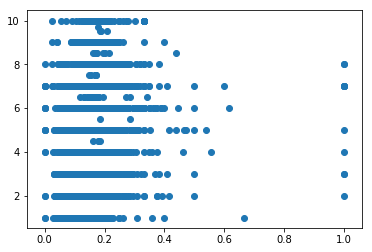

In [494]:
plt.scatter(dating_data_clean['attr'], dating_data_clean['like'])

This chart doesn't allow a good correlation visualization. In order to allow a better comparison and visualization between ratings and like, the median of rating in each like data point was calculated.

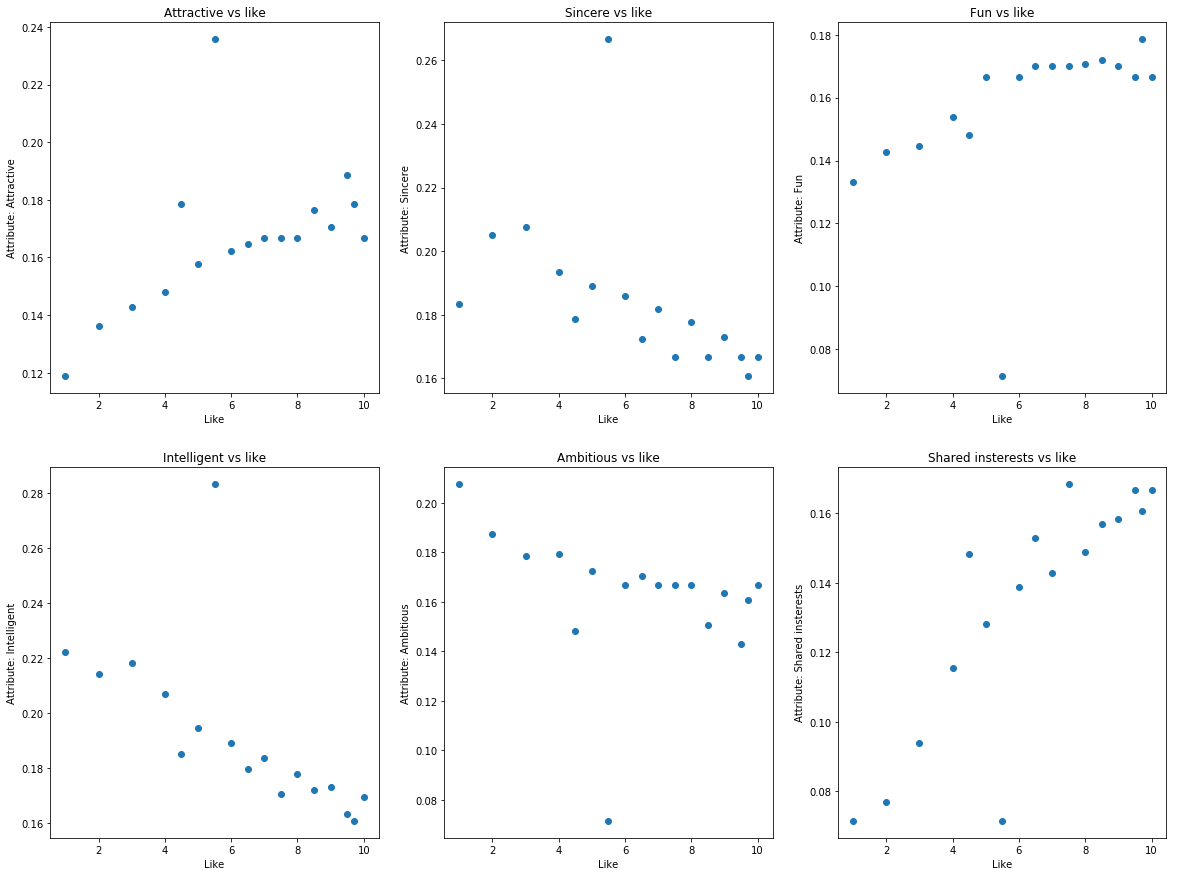

In [385]:
# grouping ratings by like to improve visualization:

by_like = dating_data_clean.groupby('like')

# Aggregate each attribute column of by_like by median
count_by_like_attr = by_like['attr'].median()
count_by_like_sinc = by_like['sinc'].median()
count_by_like_fun = by_like['fun'].median()
count_by_like_intel = by_like['intel'].median()
count_by_like_amb = by_like['amb'].median()
count_by_like_shar = by_like['shar'].median()

fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)
ax6 = fig.add_subplot(2,3,6)

# plots with like on x axis and attributes on y axis:

ax1.plot(count_by_like_attr, linestyle='None', marker='o')
ax1.set_title('Attractive vs like')
ax1.set_ylabel('Attribute: Attractive')
ax1.set_xlabel('Like')

ax2.plot(count_by_like_sinc, linestyle='None', marker='o')
ax2.set_title('Sincere vs like')
ax2.set_ylabel('Attribute: Sincere')
ax2.set_xlabel('Like')

ax3.plot(count_by_like_fun, linestyle='None', marker='o')
ax3.set_title('Fun vs like')
ax3.set_ylabel('Attribute: Fun')
ax3.set_xlabel('Like')

ax4.plot(count_by_like_intel, linestyle='None', marker='o')
ax4.set_title('Intelligent vs like')
ax4.set_ylabel('Attribute: Intelligent')
ax4.set_xlabel('Like')

ax5.plot(count_by_like_amb, linestyle='None', marker='o')
ax5.set_title('Ambitious vs like')
ax5.set_ylabel('Attribute: Ambitious')
ax5.set_xlabel('Like')

ax6.plot(count_by_like_shar, linestyle='None', marker='o')
ax6.set_title('Shared insterests vs like')
ax6.set_ylabel('Attribute: Shared insterests')
ax6.set_xlabel('Like')

plt.show()


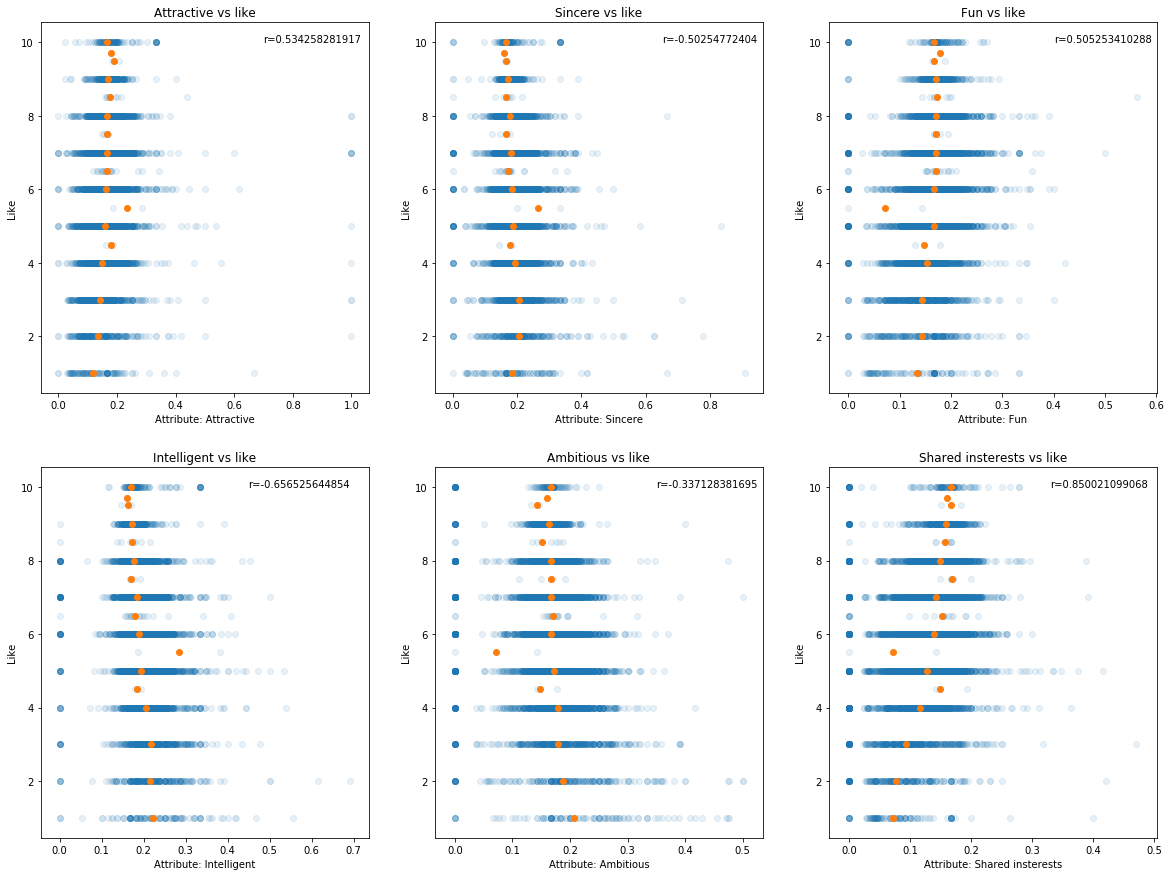

In [386]:
# Combining scatter plots for all the data (blue), for the median (orange) and pearson correlation (r):

from scipy.stats.stats import pearsonr

r_attr, p_value = pearsonr(count_by_like_attr.index, count_by_like_attr)
r_sinc, p_value = pearsonr(count_by_like_sinc.index, count_by_like_sinc)
r_fun, p_value = pearsonr(count_by_like_fun.index, count_by_like_fun)
r_intel, p_value = pearsonr(count_by_like_intel.index, count_by_like_intel)
r_amb, p_value = pearsonr(count_by_like_amb.index, count_by_like_amb)
r_shar, p_value = pearsonr(count_by_like_shar.index, count_by_like_shar)

fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)
ax6 = fig.add_subplot(2,3,6)

ax1.scatter(dating_data_clean['attr'], dating_data_clean['like'], alpha=.10)
ax1.scatter(x=count_by_like_attr, y=count_by_like_attr.index, linestyle='None', marker='o')
ax1.set_title('Attractive vs like')
ax1.set_xlabel('Attribute: Attractive')
ax1.set_ylabel('Like')
ax1.annotate('r=' + str(r_attr),xy=(0.7,10),xytext=(0.7, 10))

ax2.scatter(dating_data_clean['sinc'], dating_data_clean['like'], alpha=.10)
ax2.scatter(x=count_by_like_sinc, y=count_by_like_sinc.index, linestyle='None', marker='o')
ax2.set_title('Sincere vs like')
ax2.set_xlabel('Attribute: Sincere')
ax2.set_ylabel('Like')
ax2.annotate('r=' + str(r_sinc),xy=(0.65,10),xytext=(0.65, 10))


ax3.scatter(dating_data_clean['fun'], dating_data_clean['like'], alpha=.10)
ax3.scatter(x=count_by_like_fun, y=count_by_like_fun.index, linestyle='None', marker='o')
ax3.set_title('Fun vs like')
ax3.set_xlabel('Attribute: Fun')
ax3.set_ylabel('Like')
ax3.annotate('r=' + str(r_fun),xy=(0.4,10),xytext=(0.4, 10))

ax4.scatter(dating_data_clean['intel'], dating_data_clean['like'], alpha=.10)
ax4.scatter(x=count_by_like_intel, y=count_by_like_intel.index, linestyle='None', marker='o')
ax4.set_title('Intelligent vs like')
ax4.set_xlabel('Attribute: Intelligent')
ax4.set_ylabel('Like')
ax4.annotate('r=' + str(r_intel),xy=(0.45,10),xytext=(0.45, 10))

ax5.scatter(dating_data_clean['amb'], dating_data_clean['like'], alpha=.10)
ax5.scatter(x=count_by_like_amb, y=count_by_like_amb.index, linestyle='None', marker='o')
ax5.set_title('Ambitious vs like')
ax5.set_xlabel('Attribute: Ambitious')
ax5.set_ylabel('Like')
ax5.annotate('r=' + str(r_amb),xy=(0.35,10),xytext=(0.35, 10))

ax6.scatter(dating_data_clean['shar'], dating_data_clean['like'], alpha=.10)
ax6.scatter(x=count_by_like_shar, y=count_by_like_shar.index, linestyle='None', marker='o')
ax6.set_title('Shared insterests vs like')
ax6.set_xlabel('Attribute: Shared insterests')
ax6.set_ylabel('Like')
ax6.annotate('r=' + str(r_shar),xy=(0.33,10),xytext=(0.33, 10))

plt.show()




**Correlation between ratings the night of event (partner evaluation) and like when decision for a 2nd date = yes**

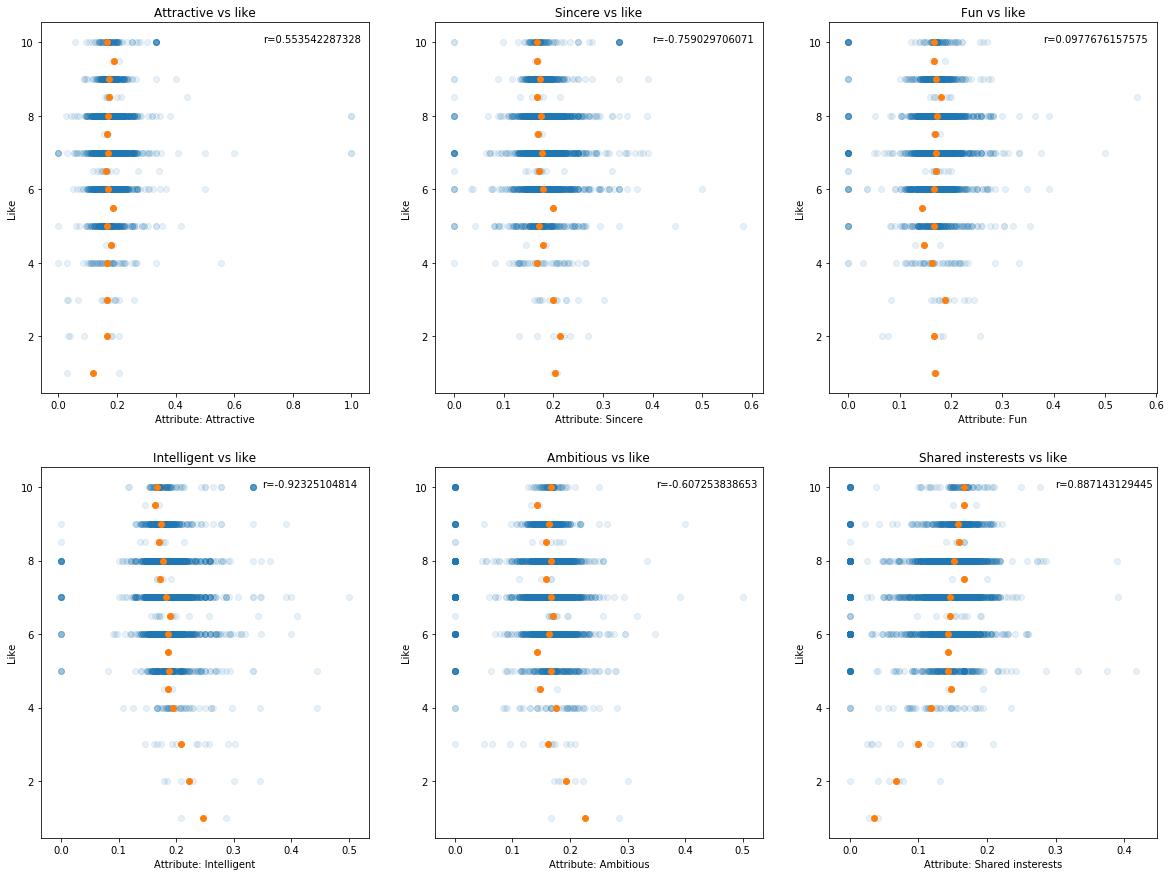

In [387]:
dec_check = dating_data_clean['dec'] == 1
dec_data_event = dating_data_clean.loc[dec_check,('attr', 'sinc', 'intel','fun','amb', 'shar', 'like')]

by_like = dec_data_event.groupby('like')

# Aggregate each attribute column of by_like by median
count_by_like_attr = by_like['attr'].median()
count_by_like_sinc = by_like['sinc'].median()
count_by_like_fun = by_like['fun'].median()
count_by_like_intel = by_like['intel'].median()
count_by_like_amb = by_like['amb'].median()
count_by_like_shar = by_like['shar'].median()

r_attr, p_value = pearsonr(count_by_like_attr.index, count_by_like_attr)
r_sinc, p_value = pearsonr(count_by_like_sinc.index, count_by_like_sinc)
r_fun, p_value = pearsonr(count_by_like_fun.index, count_by_like_fun)
r_intel, p_value = pearsonr(count_by_like_intel.index, count_by_like_intel)
r_amb, p_value = pearsonr(count_by_like_amb.index, count_by_like_amb)
r_shar, p_value = pearsonr(count_by_like_shar.index, count_by_like_shar)

fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)
ax6 = fig.add_subplot(2,3,6)

ax1.scatter(dec_data_event['attr'], dec_data_event['like'], alpha=.10)
ax1.scatter(x=count_by_like_attr, y=count_by_like_attr.index, linestyle='None', marker='o')
ax1.set_title('Attractive vs like')
ax1.set_xlabel('Attribute: Attractive')
ax1.set_ylabel('Like')
ax1.annotate('r=' + str(r_attr),xy=(0.7,10),xytext=(0.7, 10))

ax2.scatter(dec_data_event['sinc'], dec_data_event['like'], alpha=.10)
ax2.scatter(x=count_by_like_sinc, y=count_by_like_sinc.index, linestyle='None', marker='o')
ax2.set_title('Sincere vs like')
ax2.set_xlabel('Attribute: Sincere')
ax2.set_ylabel('Like')
ax2.annotate('r=' + str(r_sinc),xy=(0.4,10),xytext=(0.4, 10))


ax3.scatter(dec_data_event['fun'], dec_data_event['like'], alpha=.10)
ax3.scatter(x=count_by_like_fun, y=count_by_like_fun.index, linestyle='None', marker='o')
ax3.set_title('Fun vs like')
ax3.set_xlabel('Attribute: Fun')
ax3.set_ylabel('Like')
ax3.annotate('r=' + str(r_fun),xy=(0.38,10),xytext=(0.38, 10))

ax4.scatter(dec_data_event['intel'], dec_data_event['like'], alpha=.10)
ax4.scatter(x=count_by_like_intel, y=count_by_like_intel.index, linestyle='None', marker='o')
ax4.set_title('Intelligent vs like')
ax4.set_xlabel('Attribute: Intelligent')
ax4.set_ylabel('Like')
ax4.annotate('r=' + str(r_intel),xy=(0.35,10),xytext=(0.35, 10))

ax5.scatter(dec_data_event['amb'], dec_data_event['like'], alpha=.10)
ax5.scatter(x=count_by_like_amb, y=count_by_like_amb.index, linestyle='None', marker='o')
ax5.set_title('Ambitious vs like')
ax5.set_xlabel('Attribute: Ambitious')
ax5.set_ylabel('Like')
ax5.annotate('r=' + str(r_amb),xy=(0.35,10),xytext=(0.35, 10))

ax6.scatter(dec_data_event['shar'], dec_data_event['like'], alpha=.10)
ax6.scatter(x=count_by_like_shar, y=count_by_like_shar.index, linestyle='None', marker='o')
ax6.set_title('Shared insterests vs like')
ax6.set_xlabel('Attribute: Shared insterests')
ax6.set_ylabel('Like')
ax6.annotate('r=' + str(r_shar),xy=(0.30,10),xytext=(0.30, 10))

plt.show()

**Insights:**

- Attributes where ratings median has higher positive correlation with like: shared interests (r = 0.887), attractive (r = 0.554)
- Attributes where ratings median has negative correlation with like: intelligent (r = -0.923), sincere (r = -0.759), ambitious (r = -0.607)
- Attribute fun had a stronger positive correlation when analyzing both participants that said yes and no (r = 0.505). For only participants that said yes to a 2nd date, attribute fun has a weak positive correlation (r = 0.098). 
- Shared interests and attractive likely play a major role in a decision for a second date.
- Fun highly influences if a person likes another one in the first date, but it doesn't seem to impact like for participants that decided for 2nd date.


**Histogram of 'like' for participants who said yes to a 2nd date**

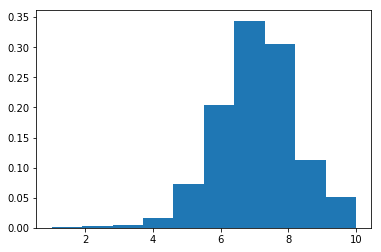

In [388]:
dec_check = dating_data_clean['dec'] == 1
dec_data_yes = dating_data_clean.loc[dec_check,('dec', 'like')]
plt.hist(dec_data_yes['like'],normed=True, bins=10)

plt.show()

In [389]:
dec_data_yes.mean()

dec     1.000000
like    7.222079
dtype: float64

**Histogram of 'like' for participants that didn't say yes for a 2nd date**

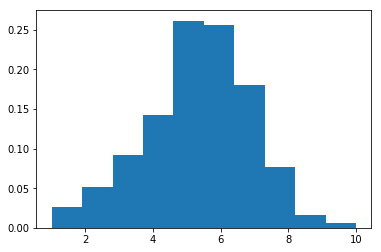

In [390]:
dec_check = dating_data_clean['dec'] == 0
dec_data_no = dating_data_clean.loc[dec_check,('dec', 'like')]
plt.hist(dec_data_no['like'],normed=True, bins=10)

plt.show()

In [391]:
dec_data_no.mean()

dec     0.000000
like    5.321819
dtype: float64

Mean of 'like' feature is higher between participants that decided for a 2nd date (7.22) vs. participants that didn't decide for a 2nd date (5.32)

**Correlation between ratings the night of event (partner evaluation) and like when decision for a 2nd date = no**

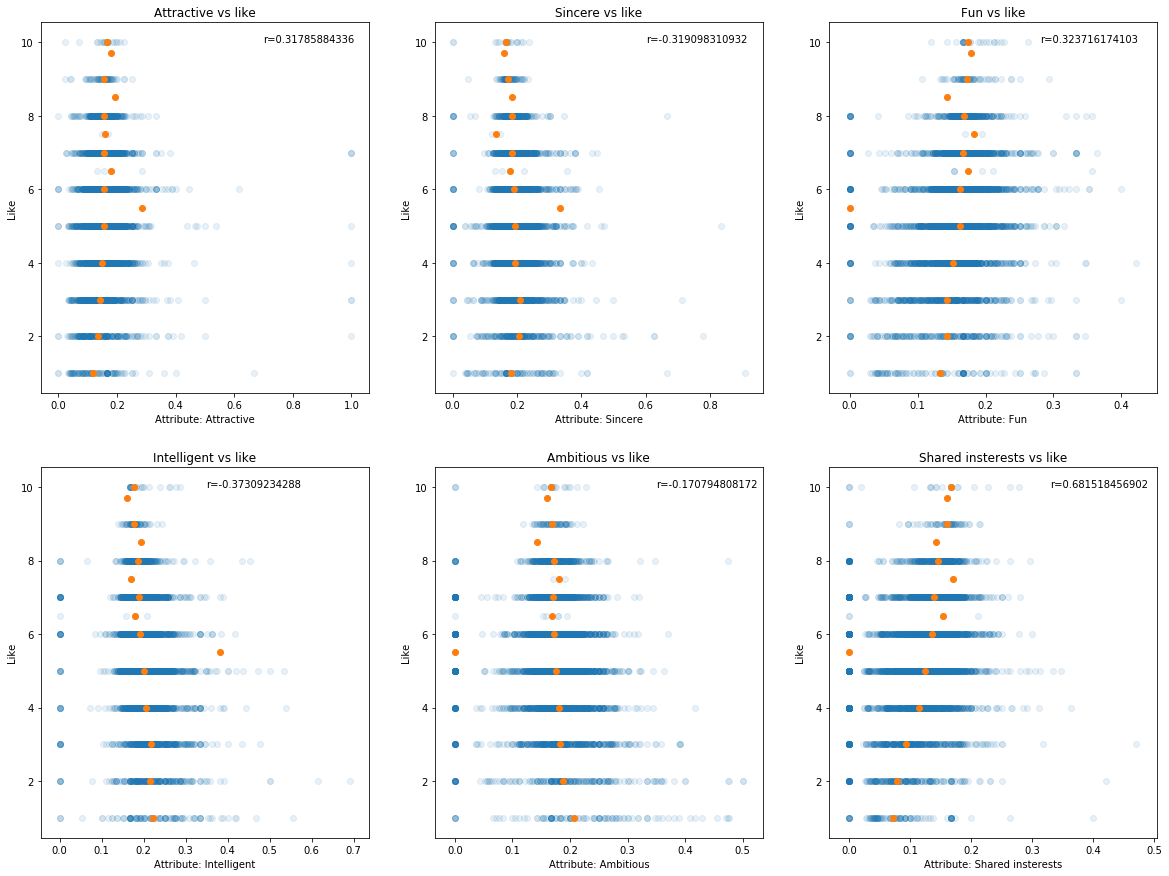

In [392]:
dec_check = dating_data_clean['dec'] == 0
dec_data_event = dating_data_clean.loc[dec_check,('attr', 'sinc', 'intel','fun','amb', 'shar', 'like')]

by_like = dec_data_event.groupby('like')

# Aggregate each attribute column of by_like by median
count_by_like_attr = by_like['attr'].median()
count_by_like_sinc = by_like['sinc'].median()
count_by_like_fun = by_like['fun'].median()
count_by_like_intel = by_like['intel'].median()
count_by_like_amb = by_like['amb'].median()
count_by_like_shar = by_like['shar'].median()

r_attr, p_value = pearsonr(count_by_like_attr.index, count_by_like_attr)
r_sinc, p_value = pearsonr(count_by_like_sinc.index, count_by_like_sinc)
r_fun, p_value = pearsonr(count_by_like_fun.index, count_by_like_fun)
r_intel, p_value = pearsonr(count_by_like_intel.index, count_by_like_intel)
r_amb, p_value = pearsonr(count_by_like_amb.index, count_by_like_amb)
r_shar, p_value = pearsonr(count_by_like_shar.index, count_by_like_shar)

fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)
ax6 = fig.add_subplot(2,3,6)

ax1.scatter(dec_data_event['attr'], dec_data_event['like'], alpha=.10)
ax1.scatter(x=count_by_like_attr, y=count_by_like_attr.index, linestyle='None', marker='o')
ax1.set_title('Attractive vs like')
ax1.set_xlabel('Attribute: Attractive')
ax1.set_ylabel('Like')
ax1.annotate('r=' + str(r_attr),xy=(0.7,10),xytext=(0.7, 10))

ax2.scatter(dec_data_event['sinc'], dec_data_event['like'], alpha=.10)
ax2.scatter(x=count_by_like_sinc, y=count_by_like_sinc.index, linestyle='None', marker='o')
ax2.set_title('Sincere vs like')
ax2.set_xlabel('Attribute: Sincere')
ax2.set_ylabel('Like')
ax2.annotate('r=' + str(r_sinc),xy=(0.6,10),xytext=(0.6, 10))


ax3.scatter(dec_data_event['fun'], dec_data_event['like'], alpha=.10)
ax3.scatter(x=count_by_like_fun, y=count_by_like_fun.index, linestyle='None', marker='o')
ax3.set_title('Fun vs like')
ax3.set_xlabel('Attribute: Fun')
ax3.set_ylabel('Like')
ax3.annotate('r=' + str(r_fun),xy=(0.28,10),xytext=(0.28, 10))

ax4.scatter(dec_data_event['intel'], dec_data_event['like'], alpha=.10)
ax4.scatter(x=count_by_like_intel, y=count_by_like_intel.index, linestyle='None', marker='o')
ax4.set_title('Intelligent vs like')
ax4.set_xlabel('Attribute: Intelligent')
ax4.set_ylabel('Like')
ax4.annotate('r=' + str(r_intel),xy=(0.35,10),xytext=(0.35, 10))

ax5.scatter(dec_data_event['amb'], dec_data_event['like'], alpha=.10)
ax5.scatter(x=count_by_like_amb, y=count_by_like_amb.index, linestyle='None', marker='o')
ax5.set_title('Ambitious vs like')
ax5.set_xlabel('Attribute: Ambitious')
ax5.set_ylabel('Like')
ax5.annotate('r=' + str(r_amb),xy=(0.35,10),xytext=(0.35, 10))

ax6.scatter(dec_data_event['shar'], dec_data_event['like'], alpha=.10)
ax6.scatter(x=count_by_like_shar, y=count_by_like_shar.index, linestyle='None', marker='o')
ax6.set_title('Shared insterests vs like')
ax6.set_xlabel('Attribute: Shared insterests')
ax6.set_ylabel('Like')
ax6.annotate('r=' + str(r_shar),xy=(0.33,10),xytext=(0.33, 10))

plt.show()

**Correlation between ratings the night of event (partner evaluation) and like by gender**

In [393]:
r_attr_o_g = (pearson_r(dating_data_clean.loc[test_gender_w,'attr'], dating_data_clean.loc[test_gender_w, 'like']),pearson_r(dating_data_clean.loc[test_gender_m,'attr'], dating_data_clean.loc[test_gender_m, 'like'])) 

# correlation: women, men
r_attr_o_g


(0.12277171406781823, 0.12762000472364957)

In [394]:
r_sinc_o_g = (pearson_r(dating_data_clean.loc[test_gender_w,'sinc'], dating_data_clean.loc[test_gender_w, 'like']),pearson_r(dating_data_clean.loc[test_gender_m,'sinc'], dating_data_clean.loc[test_gender_m, 'like'])) 

# correlation: women, men
r_sinc_o_g

(-0.15996433854008377, -0.15674072637467779)

In [395]:
r_intel_o_g = (pearson_r(dating_data_clean.loc[test_gender_w,'intel'], dating_data_clean.loc[test_gender_w, 'like']),pearson_r(dating_data_clean.loc[test_gender_m,'intel'], dating_data_clean.loc[test_gender_m, 'like'])) 

# correlation: women, men
r_intel_o_g

(-0.27774911739280395, -0.22685349150313472)

In [396]:
r_fun_o_g = (pearson_r(dating_data_clean.loc[test_gender_w,'fun'], dating_data_clean.loc[test_gender_w, 'like']),pearson_r(dating_data_clean.loc[test_gender_m,'fun'], dating_data_clean.loc[test_gender_m, 'like'])) 

# correlation: women, men
r_fun_o_g

(0.23550206444193658, 0.14736696152416054)

In [397]:
r_amb_o_g = (pearson_r(dating_data_clean.loc[test_gender_w,'amb'], dating_data_clean.loc[test_gender_w, 'like']),pearson_r(dating_data_clean.loc[test_gender_m,'amb'], dating_data_clean.loc[test_gender_m, 'like'])) 

# correlation: women, men
r_amb_o_g

(-0.17642715529452119, -0.15619277016020217)

In [398]:
r_shar_o_g = (pearson_r(dating_data_clean.loc[test_gender_w,'shar'], dating_data_clean.loc[test_gender_w, 'like']),pearson_r(dating_data_clean.loc[test_gender_m,'shar'], dating_data_clean.loc[test_gender_m, 'like'])) 

# correlation: women, men
r_shar_o_g

(0.25880189284050809, 0.19818241200961526)

Findings: 
- not a big difference based on gender

**Correlation between attributes importance at sign up and partner evaluation the night of event when decision to see partner again = yes**

In [399]:
dec_check = dating_data_clean['dec'] == 1
dec_data_event = dating_data_clean.loc[dec_check,'attr':'shar']
dec_data_event.describe()

,attr,sinc,intel,fun,amb,shar
count,3501.000000,3501.000000,3501.000000,3501.000000,3501.000000,3501.000000
mean,0.175837,0.179777,0.183482,0.170709,0.155295,0.134328
std,0.048919,0.039845,0.037531,0.039198,0.050874,0.055564
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.155556,0.163265,0.166667,0.157895,0.146341,0.120000
50%,0.170213,0.175000,0.179487,0.170213,0.166667,0.148936
75%,0.190476,0.195122,0.195122,0.186047,0.179487,0.166667
max,1.000000,0.583333,0.500000,0.562500,0.500000,0.416667


<function matplotlib.pyplot.show>

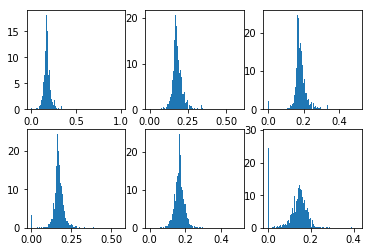

In [400]:
plt.subplot(2, 3, 1)
plt.hist(dec_data_event['attr'], normed=True, bins=100)

plt.subplot(2, 3, 2)
plt.hist(dec_data_event['sinc'], normed=True, bins=100)

plt.subplot(2, 3, 3)
plt.hist(dec_data_event['intel'], normed=True, bins=100)

plt.subplot(2, 3, 4)
plt.hist(dec_data_event['fun'], normed=True, bins=100)

plt.subplot(2, 3, 5)
plt.hist(dec_data_event['amb'], normed=True, bins=100)

plt.subplot(2, 3, 6)
plt.hist(dec_data_event['shar'], normed=True, bins=100)


plt.show

In [401]:
dec_data_signup = dating_data_clean.loc[dec_check,'attr1_1':'shar1_1']
dec_data_signup.describe()

,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
count,3501.000000,3501.000000,3501.000000,3501.000000,3501.000000,3501.000000
mean,0.220708,0.175060,0.200642,0.172801,0.104025,0.120196
std,0.127457,0.071467,0.069375,0.063975,0.060419,0.067829
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150000,0.150000,0.177782,0.147071,0.050000,0.080000
50%,0.200000,0.189219,0.200000,0.179518,0.100000,0.111111
75%,0.250000,0.200000,0.238100,0.200000,0.150000,0.169800
max,1.000000,0.600000,0.500000,0.500000,0.358108,0.300000


In [402]:
from scipy.stats.stats import pearsonr

r, p_value = pearsonr(dec_data_signup["attr1_1"], dec_data_event["attr"])
r

0.086546249680664961

In [403]:
r, p_value = pearsonr(dec_data_signup["sinc1_1"], dec_data_event["sinc"])
r

0.020917505186251947

In [404]:
r, p_value = pearsonr(dec_data_signup["intel1_1"], dec_data_event["intel"])
r

-0.0030664663878727572

In [405]:
r, p_value = pearsonr(dec_data_signup["fun1_1"], dec_data_event["fun"])
r

0.049377289497941304

In [406]:
r, p_value = pearsonr(dec_data_signup["amb1_1"], dec_data_event["amb"])
r

0.097102323711419844

In [407]:
r, p_value = pearsonr(dec_data_signup["shar1_1"], dec_data_event["shar"])
r

-0.012589961417340386

Weak correlation between attributes that were ranked based on importance at sign up and attributes ranking the night of even for participants that said yes to a second date.

**Correlation between attributes importance at sign up and partner evaluation the night of event when decision to see partner again = no**

In [408]:
dec_check_no = dating_data_clean['dec'] == 0
dec_data_event = dating_data_clean.loc[dec_check_no,'attr':'shar']
dec_data_event.describe()

,attr,sinc,intel,fun,amb,shar
count,4629.000000,4629.000000,4629.000000,4629.000000,4629.000000,4629.000000
mean,0.156182,0.196363,0.201832,0.157815,0.172094,0.114851
std,0.062003,0.056962,0.050860,0.047794,0.061538,0.059659
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.127660,0.166667,0.176471,0.138889,0.152174,0.081081
50%,0.153846,0.191489,0.195122,0.162162,0.175000,0.127660
75%,0.178571,0.216216,0.222222,0.181818,0.200000,0.155556
max,1.000000,0.909091,0.692308,0.421053,0.500000,0.470588


In [409]:
dec_data_signup = dating_data_clean.loc[dec_check_no,'attr1_1':'shar1_1']
dec_data_signup.describe()

,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
count,4629.000000,4629.000000,4629.000000,4629.000000,4629.000000,4629.000000
mean,0.224966,0.170440,0.201641,0.172309,0.106942,0.113765
std,0.127057,0.072438,0.070870,0.062112,0.060834,0.062099
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150000,0.140000,0.173100,0.150000,0.050000,0.080000
50%,0.200000,0.180000,0.200000,0.180000,0.100000,0.100000
75%,0.250000,0.200000,0.227323,0.200000,0.150000,0.150000
max,1.000000,0.600000,0.500000,0.500000,0.358108,0.300000


In [410]:
r, p_value = pearsonr(dec_data_signup["attr1_1"], dec_data_event["attr"])
r

-0.00051471266892049849

In [411]:
r, p_value = pearsonr(dec_data_signup["sinc1_1"], dec_data_event["sinc"])
r

-0.039554598532254466

In [412]:
r, p_value = pearsonr(dec_data_signup["intel1_1"], dec_data_event["intel"])
r

0.0055873165749676284

In [413]:
r, p_value = pearsonr(dec_data_signup["fun1_1"], dec_data_event["fun"])
r

-0.0057500832787492949

In [414]:
r, p_value = pearsonr(dec_data_signup["amb1_1"], dec_data_event["amb"])
r

0.073008487335619182

In [415]:
r, p_value = pearsonr(dec_data_signup["shar1_1"], dec_data_event["shar"])
r

-0.00041948542298585808

All but intelligence attribute have negative correlation, which is expected for the group with decision = no

Weak correlation between attributes that were ranked based on importance at sign up and attributes ranking the night of even for participants that said no to a second date, which may indicate that they said no because the partner didn't meet their expectations in the important attributes.

**Analysis between self evaluation and ratings received by partner when decision to be seen by partner again = yes**

Question: does the self assessment (self-confidence regarding own attributes) define how the participant is perceived by partners?

In [495]:
dec_data_self = dating_data_clean.loc[dec_check,'attr3_1':'amb3_1']
dec_data_self.describe()

,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1
count,3501.000000,3501.000000,3501.000000,3501.000000,3501.000000
mean,0.176693,0.209894,0.193718,0.215201,0.191071
std,0.035148,0.041656,0.039154,0.036100,0.043039
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.162162,0.200000,0.179487,0.200000,0.175000
50%,0.181818,0.214286,0.200000,0.214286,0.200000
75%,0.200000,0.230769,0.214286,0.232558,0.214286
max,0.264706,0.347826,0.303030,0.360000,0.285714


In [496]:
dec_data_partner = dating_data_clean.loc[dec_check,'pf_o_att':'pf_o_sha']
dec_data_partner.describe()

,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha
count,3501.000000,3501.000000,3501.000000,3501.000000,3501.000000,3501.000000
mean,0.227281,0.166043,0.200332,0.174684,0.107601,0.110634
std,0.138812,0.071668,0.072088,0.064646,0.062691,0.062403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150000,0.125000,0.173100,0.150000,0.050000,0.055556
50%,0.200000,0.179500,0.200000,0.181818,0.100000,0.100000
75%,0.250000,0.200000,0.222222,0.200000,0.150000,0.150000
max,1.000000,0.600000,0.500000,0.500000,0.358108,0.300000


In [497]:
r, p_value = pearsonr(dec_data_self["attr3_1"], dec_data_partner["pf_o_att"])
r

-0.029551871953478265

In [498]:
r, p_value = pearsonr(dec_data_self["sinc3_1"], dec_data_partner["pf_o_sin"])
r

0.015129644062762451

In [499]:
r, p_value = pearsonr(dec_data_self["intel3_1"], dec_data_partner["pf_o_fun"])
r

-0.022140472044141286

In [500]:
r, p_value = pearsonr(dec_data_self["fun3_1"], dec_data_partner["pf_o_fun"])
r

0.025746852496231536

In [422]:
r, p_value = pearsonr(dec_data_self["amb3_1"], dec_data_partner["pf_o_amb"])
r

0.016600644569527954

Weak correlation between self-assessment and ratings received by partners.

**Analysis between self assessment and ratings received by partner when decision to be seen by partner again = no**

In [423]:
dec_data_self_no = dating_data_clean.loc[dec_check_no,'attr3_1':'amb3_1']
dec_data_self_no.describe()

,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1
count,4629.000000,4629.000000,4629.000000,4629.000000,4629.000000
mean,0.180393,0.211420,0.194544,0.212983,0.190290
std,0.032311,0.040670,0.035735,0.034069,0.040758
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.166667,0.195122,0.181818,0.200000,0.175000
50%,0.184211,0.214286,0.200000,0.210526,0.200000
75%,0.200000,0.232558,0.214286,0.227273,0.214286
max,0.264706,0.347826,0.303030,0.360000,0.285714


In [424]:
dec_data_partner_no = dating_data_clean.loc[dec_check_no,'pf_o_att':'pf_o_sha']
dec_data_partner_no.describe()

,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha
count,4629.000000,4629.000000,4629.000000,4629.000000,4629.000000,4629.000000
mean,0.218194,0.177146,0.201322,0.170772,0.104174,0.121046
std,0.116682,0.072222,0.069449,0.062077,0.059327,0.066038
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150000,0.150000,0.173100,0.150000,0.050000,0.100000
50%,0.200000,0.190000,0.200000,0.173900,0.100000,0.116312
75%,0.250000,0.200000,0.238100,0.200000,0.150000,0.162816
max,1.000000,0.600000,0.500000,0.500000,0.358108,0.300000


### Distances between attributes importance for each participant in a date at sign up:

Question: does the distance between what is important for the couple at sign up has any impact on the decion for a second date?

In [456]:
dis_att_imp = abs(dating_data_clean['pf_o_att'] - dating_data_clean['attr1_1'])
dis_sinc_imp = abs(dating_data_clean['pf_o_sin'] - dating_data_clean['sinc1_1'])
dis_intel_imp = abs(dating_data_clean['pf_o_int'] - dating_data_clean['intel1_1'])
dis_fun_imp = abs(dating_data_clean['pf_o_fun'] - dating_data_clean['fun1_1'])
dis_amb_imp = abs(dating_data_clean['pf_o_amb'] - dating_data_clean['amb1_1'])
dis_sha_imp = abs(dating_data_clean['pf_o_sha'] - dating_data_clean['shar1_1'])


In [458]:
# Distance for each attribute for each couple:

dating_data_clean['dis_att_imp'] = dis_att_imp
dating_data_clean['dis_sinc_imp'] = dis_sinc_imp
dating_data_clean['dis_intel_imp'] = dis_intel_imp
dating_data_clean['dis_fun_imp'] = dis_fun_imp
dating_data_clean['dis_amb_imp'] = dis_amb_imp
dating_data_clean['dis_sha_imp'] = dis_sha_imp

In [457]:
# Euclidean distance of all attributes importance for each couple:

dating_data_clean['dist_imp'] = (dis_att_imp**2 + dis_sinc_imp**2 + dis_intel_imp**2 + dis_fun_imp**2 + dis_amb_imp**2 + dis_sha_imp**2)**(1/2)

In [459]:
## Square distance for each attribute (to allow better comparison if differences are very close)

dating_data_clean['dis_att_imp2'] = dis_att_imp**2
dating_data_clean['dis_sinc_imp2'] = dis_sinc_imp**2
dating_data_clean['dis_intel_imp2'] = dis_intel_imp**2
dating_data_clean['dis_fun_imp2'] = dis_fun_imp**2
dating_data_clean['dis_amb_imp2'] = dis_amb_imp**2
dating_data_clean['dis_sha_imp2'] = dis_sha_imp**2

**Distance when match (both participants opted for a 2nd date) is yes**

In [460]:
dating_data_imp_yes = dating_data_clean[dating_data_clean['match'] == 1]

In [461]:
# Median of difference for each attribute

dating_data_imp_yes[['dis_att_imp', 'dis_sinc_imp', 'dis_intel_imp', 'dis_fun_imp', 'dis_amb_imp', 'dis_sha_imp']].median()

dis_att_imp      0.098995
dis_sinc_imp     0.050000
dis_intel_imp    0.050000
dis_fun_imp      0.050000
dis_amb_imp      0.050000
dis_sha_imp      0.056812
dtype: float64

In [462]:
# Median of square difference for each attribute

dating_data_imp_yes[['dis_att_imp2', 'dis_sinc_imp2', 'dis_intel_imp2', 'dis_fun_imp2', 'dis_amb_imp2', 'dis_sha_imp2']].median()

dis_att_imp2      0.009800
dis_sinc_imp2     0.002500
dis_intel_imp2    0.002500
dis_fun_imp2      0.002500
dis_amb_imp2      0.002500
dis_sha_imp2      0.003228
dtype: float64

In [463]:
# Median of distance for all attributes

dating_data_imp_yes['dist_imp'].median()

0.2017422577816702

**Distance when match is no**

In [464]:
dating_data_imp_no = dating_data_clean[dating_data_clean['match'] == 0]

In [465]:
# Median of difference for each attribute

dating_data_imp_no[['dis_att_imp', 'dis_sinc_imp', 'dis_intel_imp', 'dis_fun_imp', 'dis_amb_imp', 'dis_sha_imp']].median()

dis_att_imp      0.10
dis_sinc_imp     0.05
dis_intel_imp    0.05
dis_fun_imp      0.05
dis_amb_imp      0.05
dis_sha_imp      0.05
dtype: float64

In [466]:
# Median of square difference for each attribute

dating_data_imp_no[['dis_att_imp2', 'dis_sinc_imp2', 'dis_intel_imp2', 'dis_fun_imp2', 'dis_amb_imp2', 'dis_sha_imp2']].median()

dis_att_imp2      0.0100
dis_sinc_imp2     0.0025
dis_intel_imp2    0.0025
dis_fun_imp2      0.0025
dis_amb_imp2      0.0025
dis_sha_imp2      0.0025
dtype: float64

In [467]:
# Median of distance for all attributes

dating_data_imp_no['dist_imp'].median()

0.21213203435596428

Insight:
- The median of distance for each attribute is not very conclusive for this analysis
- The median of square distance for each attribute is not very conclusive for this analysis
- The median of total distance for attributes importance is lower in participants who matched. It may indicate that participants who value the same tend to say as to a 2nd date (match). 

### Distances between self evaluated attributes:

**Determining the self evaluation for all participants and merging it (not readily available in the Dataframe)**

In [468]:
dating_self = dating_data_clean[['iid', 'attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1']].copy()
dating_self = dating_self.drop_duplicates()

In [469]:
dating_data_self = dating_data_clean.merge(dating_self, how='inner', left_on = 'pid', right_on = 'iid')
dating_data_self.columns

Index(['iid_x', 'gender', 'idg', 'partner', 'pid', 'match', 'pf_o_att',
       'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'dec_o',
       'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o',
       'prob_o', 'met_o', 'age', 'field_cd', 'goal', 'date', 'go_out',
       'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'expnum',
       'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1',
       'attr3_1_x', 'sinc3_1_x', 'fun3_1_x', 'intel3_1_x', 'amb3_1_x', 'dec',
       'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met',
       'match_es', 'attr3_s', 'sinc3_s', 'intel3_s', 'fun3_s', 'amb3_s',
       'dist_imp', 'dis_att_imp', 'dis_sinc_imp', 'dis_intel_imp',
       'dis_fun_imp', 'dis_amb_imp', 'dis_sha_imp', 'dis_att_imp2',
       'dis_sinc_imp2', 'dis_intel_imp2', 

**Calculating distances**

In [470]:
dis_att = abs(dating_data_self['attr3_1_x'] - dating_data_self['attr3_1_y'])
dis_sinc = abs(dating_data_self['sinc3_1_x'] - dating_data_self['sinc3_1_y'])
dis_intel = abs(dating_data_self['intel3_1_x'] - dating_data_self['intel3_1_y'])
dis_fun = abs(dating_data_self['fun3_1_x'] - dating_data_self['fun3_1_y'])
dis_amb = abs(dating_data_self['amb3_1_x'] - dating_data_self['amb3_1_y'])

In [471]:
dating_data_self['dis_att_s'] = dis_att
dating_data_self['dis_sinc_s'] = dis_sinc
dating_data_self['dis_intel_s'] = dis_intel
dating_data_self['dis_fun_s'] = dis_fun
dating_data_self['dis_amb_s'] = dis_amb

In [472]:
dating_data_self['dist_self'] = (dis_att**2 + dis_sinc**2 + dis_intel**2 + dis_fun**2 + dis_amb**2)**(1/2)

In [473]:
# Calculating square distance for each attributes to make the comparison easier (bigger numbers)

dating_data_self['dis_att_s2'] = dis_att**2
dating_data_self['dis_sinc_s2'] = dis_sinc**2
dating_data_self['dis_intel_s2'] = dis_intel**2
dating_data_self['dis_fun_s2'] = dis_fun**2
dating_data_self['dis_amb_s2'] = dis_amb**2

**Distance when match is yes**

In [474]:
dating_data_self_yes = dating_data_self[dating_data_self['match'] == 1]

In [475]:
dating_data_self_yes[['dis_att_s', 'dis_sinc_s', 'dis_intel_s', 'dis_fun_s', 'dis_amb_s']].median()

dis_att_s      0.025000
dis_sinc_s     0.026374
dis_intel_s    0.020455
dis_fun_s      0.025000
dis_amb_s      0.029268
dtype: float64

In [476]:
dating_data_self_yes[['dis_att_s2', 'dis_sinc_s2', 'dis_intel_s2', 'dis_fun_s2', 'dis_amb_s2']].median()

dis_att_s2      0.000625
dis_sinc_s2     0.000696
dis_intel_s2    0.000418
dis_fun_s2      0.000625
dis_amb_s2      0.000857
dtype: float64

In [477]:
dating_data_self_yes['dist_self'].median()

0.0754615548851389

**Distance match is no**

In [478]:
dating_data_self_no = dating_data_self[dating_data_self['match'] == 0]

In [479]:
dating_data_self_no[['dis_att_s', 'dis_sinc_s', 'dis_intel_s', 'dis_fun_s', 'dis_amb_s']].median()

dis_att_s      0.025000
dis_sinc_s     0.028674
dis_intel_s    0.023443
dis_fun_s      0.025094
dis_amb_s      0.031714
dtype: float64

In [480]:
dating_data_self_no[['dis_att_s2', 'dis_sinc_s2', 'dis_intel_s2', 'dis_fun_s2', 'dis_amb_s2']].median()

dis_att_s2      0.000625
dis_sinc_s2     0.000822
dis_intel_s2    0.000550
dis_fun_s2      0.000630
dis_amb_s2      0.001006
dtype: float64

In [481]:
dating_data_self_no['dist_self'].median()

0.07993541639045745

Insight:
- The distance median for each attribute is very similar for cases with yes (match) or no to a 2nd date
- The square distance median for all attribute is lower in cases with a match, except for attractiveness which is the same. It may indicate that how participants who opted for a 2nd date view themselves is more similar than participants who didn't have a match.
- The total distance median is lower for participants who decided for a 2nd date, which aligns with the square distance median insight.

## Conclusion

**Features to be explored in the machine learning model:**
- Attributes important at sign up
- Distance between attributes important at sign up
- Distance between self evaluation at sign up